## gensim

In [54]:
import numpy as np
import gensim
import gensim.downloader as api
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [55]:
gensim.__version__

'4.3.1'

In [33]:
# import os
# os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
# os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

## embedding matrix

In [5]:
# glove-wiki-gigaword-100
# glove-wiki-gigaword-300
model = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [53]:
import json
json.load(open(os.path.expanduser('~') + '/gensim-data/information.json'))['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [56]:
print(model.vectors.shape)
print(model.vectors.min())
print(model.vectors.max())

(400000, 50)
-5.4593
5.3101


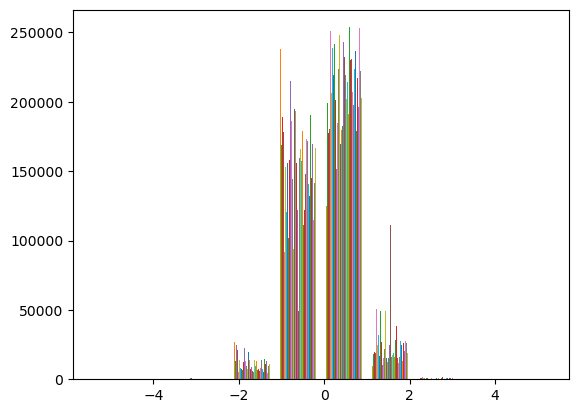

In [46]:
_ = plt.hist(model.vectors)

In [6]:
model["king"]

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [24]:
np.linalg.norm(model['king'])

5.3744817

## similar/distance

In [7]:
model.most_similar("king")

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539914846420288),
 ('brother', 0.7492412328720093),
 ('ruler', 0.7434253096580505)]

In [19]:
king = model["king"]
prince = model['prince']

king_norm = np.linalg.norm(king)
prince_norm = np.linalg.norm(prince)
np.dot(king, prince) / (king_norm * prince_norm)

0.82361794

In [15]:
model.cosine_similarities(king, [prince])

array([0.82361794], dtype=float32)

In [29]:
def cos_sim(v1, v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    return np.dot(v1, v2) / (v1_norm * v2_norm)

## 可视化分析

- heatmap

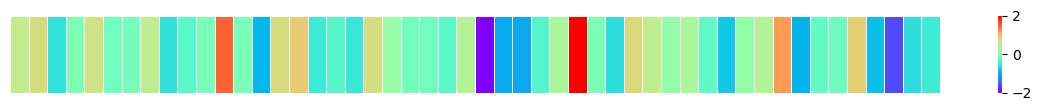

In [57]:
plt.figure(figsize=(15,1))
sns.heatmap([model["king"]], xticklabels=False, yticklabels=False, cbar=True,
            vmin=-2, vmax=2, linewidths=0.7, cmap='rainbow')
plt.show()

In [59]:
model["king"]

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

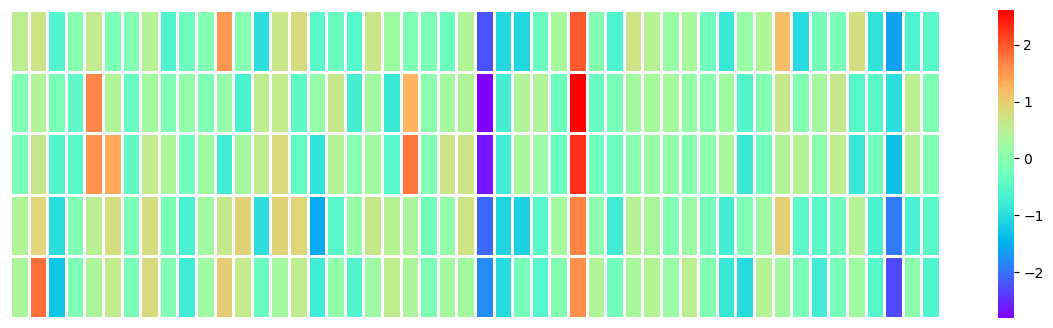

In [28]:
# king - man = queen - woman
# king - man + woman = queen
# king + woman - man = queen
plt.figure(figsize=(15,4))
sns.heatmap([model["king"], 
             model["man"], 
             model["woman"], 
             model["king"] - model["man"] + model["woman"],
             model["queen"],
            ], cbar=True, xticklabels=False, yticklabels=False,linewidths=1, cmap='rainbow') 
plt.show()
     

In [32]:
[cos_sim(model["queen"], v) for v in 
    [model['king'], model['man'], model['woman'], model["king"] - model["man"] + model["woman"]]]

[0.7839043, 0.5366701, 0.6003106, 0.86095804]

In [60]:
model.cosine_similarities(model["queen"], 
                          [model['king'], 
                           model['man'], 
                           model['woman'],
                           model["king"] - model["man"] + model["woman"]])

array([0.7839044 , 0.53666997, 0.60031056, 0.86095816], dtype=float32)